In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from src.california_housing import read_data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
# Load train and test data
df_train = read_data.read_file("fish_regression", "strat_train_set", csv=True)
df_test = read_data.read_file("fish_regression", "strat_test_set", csv=True)

# Polynomial Regression

### Train and Test Split

In [3]:
# Train Dataset: independent variable (Weight), y: dependent variable (Length1)
X_train = df_train.drop(["Weight", "Species"], axis=1)
y_train = df_train['Weight']

# Test Dataset: independent variable (Weight), y: dependent variable (Length1)
X_test = df_test.drop(["Weight", "Species"], axis=1)
y_test = df_test['Weight']

### Create Polynomial Features

In [4]:
# Define the degrees to iterate on
degrees = [1,2,3]

for degree in degrees:
    
    # Transform features into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Create a linear regression model
    model = LinearRegression()
    # Fit the model to the training data
    model.fit(X_train_poly, y_train)
    # Make predictions on the test set
    y_pred_poly = model.predict(X_test_poly)
    # Make predictions on the training set
    y_train_pred_poly = model.predict(X_train_poly)
    # Calculate metrics for test set 
    mse_test_poly = mean_squared_error(y_test, y_pred_poly)
    r2_test_poly = r2_score(y_test, y_pred_poly)
    # Calculate metrics for training set
    mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    # Print results
    print(f"Degree: {degree}")
    print(f"Train MSE: {mse_train_poly:.4f}, Train R-squared: {r2_train_poly:.4f}")
    print(f"Test MSE: {mse_test_poly:.4f}, Test R-squared: {r2_test_poly:.4f}")
    print("-" * 50)

Degree: 1
Train MSE: 12819.7346, Train R-squared: 0.8837
Test MSE: 24935.5210, Test R-squared: 0.8704
--------------------------------------------------
Degree: 2
Train MSE: 1993.1198, Train R-squared: 0.9819
Test MSE: 2771.7204, Test R-squared: 0.9856
--------------------------------------------------
Degree: 3
Train MSE: 924.8324, Train R-squared: 0.9916
Test MSE: 4342.2766, Test R-squared: 0.9774
--------------------------------------------------


### Create best Model

In [5]:
# Define the degree of the polynomial
degree = 2

# Transform features into polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train_poly, y_train)

LinearRegression()

In [6]:
# Make predictions on the test set
y_pred_poly = model.predict(X_test_poly)

In [7]:
# Calculate residuals for the test set
test_residuals_poly = y_test - y_pred_poly
# Make predictions on the training set
y_train_pred_poly = model.predict(X_train_poly)
# Calculate residuals for the training set
train_residuals_poly = y_train - y_train_pred_poly
# Calculate metrics for test set
mse_test_poly = mean_squared_error(y_test, y_pred_poly)
r2_test_poly = r2_score(y_test, y_pred_poly)
# Calculate metrics for training set
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

In [8]:
# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(50*"-")
# Evaluate the model
print("Mean Squared Error Test-Set:", mse_test_poly)
print("R-squared Test-Set:", r2_test_poly)
print(50*"-")
print("Mean Squared Error Train-Set:", mse_train_poly)
print("R-squared Train-Set:", r2_train_poly)

Coefficients: [ 0.00000000e+00 -3.05027435e+01 -1.97649573e+01  1.51033643e+01
 -1.78870962e+01  8.22390585e+01 -4.02526471e+01  3.51998774e+01
  3.30766622e+01 -1.60979883e+01  6.08663733e+01 -1.55788495e+01
 -8.22325754e-02  5.30072944e+00 -1.43221221e+01 -1.25208035e+01
  1.02541064e+01 -4.30767904e+01 -6.63103211e+00  2.73511726e+01
 -1.29091308e+01]
Intercept: 194.44761225595542
--------------------------------------------------
Mean Squared Error Test-Set: 2771.7203925470026
R-squared Test-Set: 0.9855977555453724
--------------------------------------------------
Mean Squared Error Train-Set: 1993.1197571361802
R-squared Train-Set: 0.9819232499922272


### Diagnostics

#### Trainset

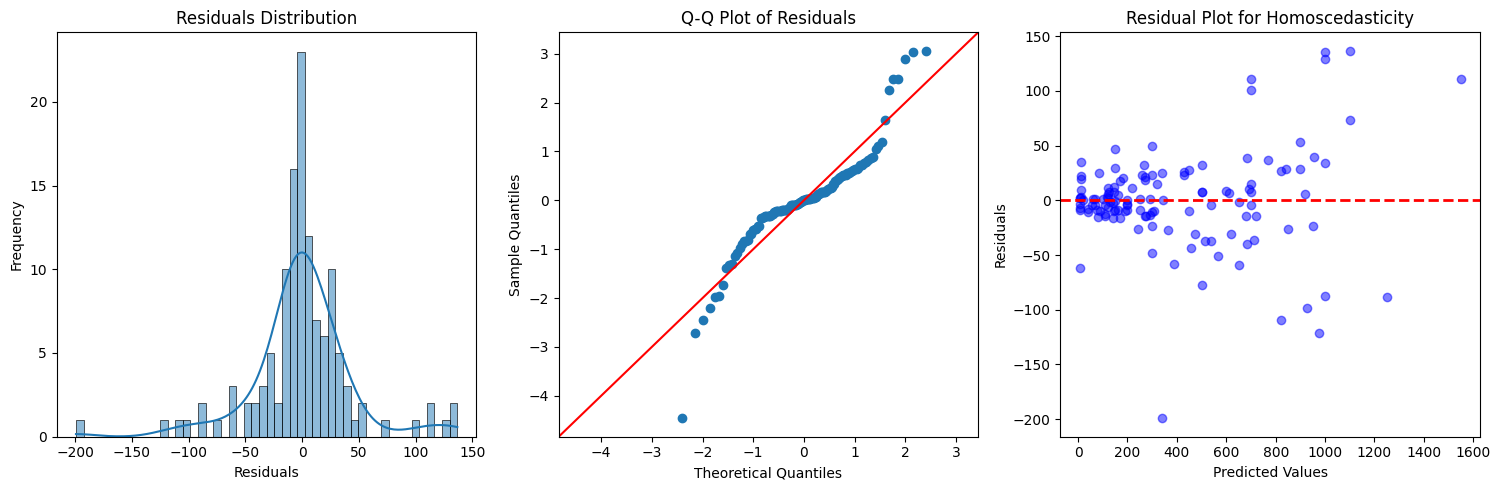

In [9]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

# Plot the residuals distribution for the training set
sns.histplot(train_residuals_poly, bins=50, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Q-Q plot of residuals for the training set
sm.qqplot(train_residuals_poly, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Create a residual plot
ax[2].scatter(y_train, train_residuals_poly, color='blue', alpha=0.5)
ax[2].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Residual Plot for Homoscedasticity')

plt.tight_layout()
plt.show()

#### Testset

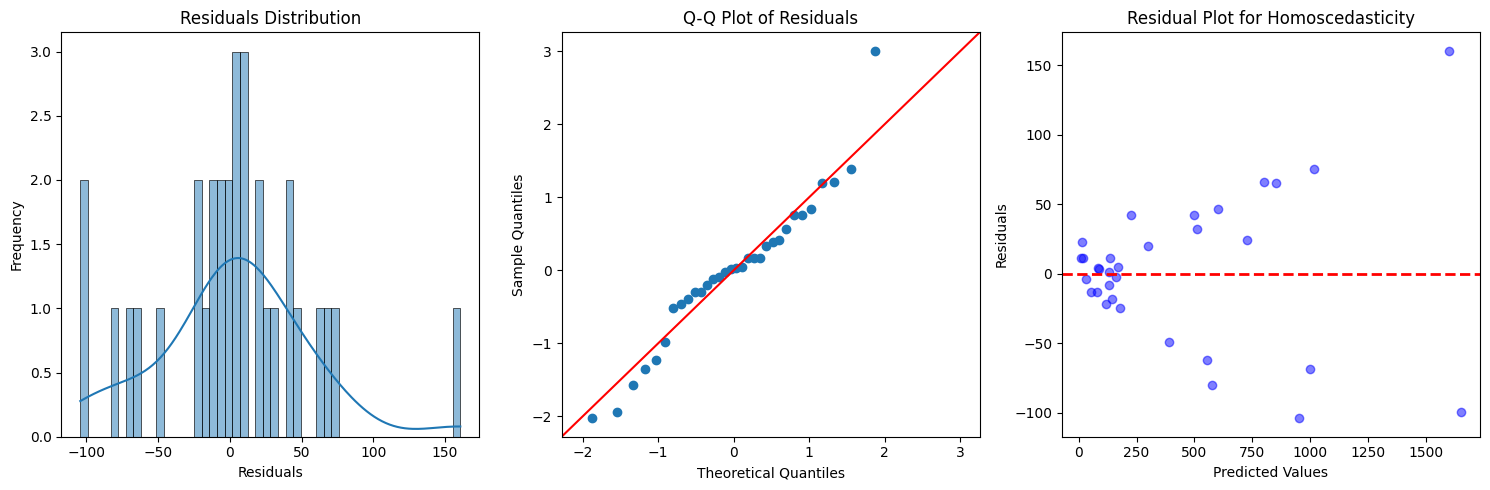

In [10]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

# Plot the residuals distribution for the training set
sns.histplot(test_residuals_poly, bins=50, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Q-Q plot of residuals for the training set
sm.qqplot(test_residuals_poly, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Create a residual plot
ax[2].scatter(y_test, test_residuals_poly, color='blue', alpha=0.5)
ax[2].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Residual Plot for Homoscedasticity')

plt.tight_layout()
plt.show()